# Exercise 3 - ANN for two-class classification

# Objective : Learning the construction and usage of ANN for two-class classification problem

# Problem : 

# (1)   Design ANN with 4 hidden layers with 8,16,16,8 neurons  and appropriate input and output layers for bankruptcy data
# (2)   Obtain various classification metrics of your choice based on the training data
# (3) Display the results using charts of your choice
# (4) Illustrate how out of sample prediction can be made

## The data is given below: 
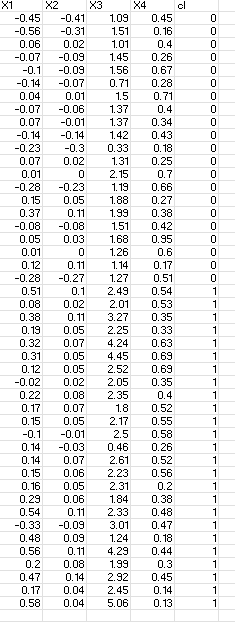


# Step 1 : Importing the data and slicing the feature columns and target

In [2]:
from google.colab import files
uploaded=files.upload()

Saving bank.csv to bank.csv


In [3]:
import pandas as pd
import io
df=pd.read_csv(io.BytesIO(uploaded['bank.csv']))
X=df.iloc[:,:4]
y=df.iloc[:,4:5]

# Step 2 : Constructing the ANN

In [4]:
from keras import models, layers
model=models.Sequential()
#model.add(layers.Dense(8,activation='relu',input_dim=4)) # hidden layer -1 receiving 4 inputs
model.add(layers.Dense(8,activation='relu',input_shape=(4,))) # hidden layer -1 receiving 4 inputs
model.add(layers.Dense(16,activation='elu')) # hidden layer-2
model.add(layers.Dense(16,activation='elu')) # hidden layer-3
model.add(layers.Dense(8,activation='elu'))  # hidden layer-4
model.add(layers.Dense(1,activation='sigmoid')) # output layer producing one output lying between 0 and 1
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________
None


# Step 3 : Compiling the Model

In [5]:
model.compile(loss='binary_crossentropy',metrics=['binary_crossentropy','accuracy'])

# Step 4 : Fitting the model

In [6]:
hist=model.fit(X,y,epochs=10)

Epoch 1/10
2/2 [==============================] - 1s 16ms/step - loss: 0.6552 - binary_crossentropy: 0.6552 - accuracy: 0.6087
Epoch 2/10
2/2 [==============================] - 0s 11ms/step - loss: 0.6416 - binary_crossentropy: 0.6416 - accuracy: 0.6087
Epoch 3/10
2/2 [==============================] - 0s 11ms/step - loss: 0.6358 - binary_crossentropy: 0.6358 - accuracy: 0.6087
Epoch 4/10
2/2 [==============================] - 0s 11ms/step - loss: 0.6301 - binary_crossentropy: 0.6301 - accuracy: 0.6087
Epoch 5/10
2/2 [==============================] - 0s 10ms/step - loss: 0.6241 - binary_crossentropy: 0.6241 - accuracy: 0.6087
Epoch 6/10
2/2 [==============================] - 0s 11ms/step - loss: 0.6180 - binary_crossentropy: 0.6180 - accuracy: 0.6087
Epoch 7/10
2/2 [==============================] - 0s 10ms/step - loss: 0.6123 - binary_crossentropy: 0.6123 - accuracy: 0.6522
Epoch 8/10
2/2 [==============================] - 0s 10ms/step - loss: 0.6061 - binary_crossentropy: 0.6061 - a

# Displaying the accuracy

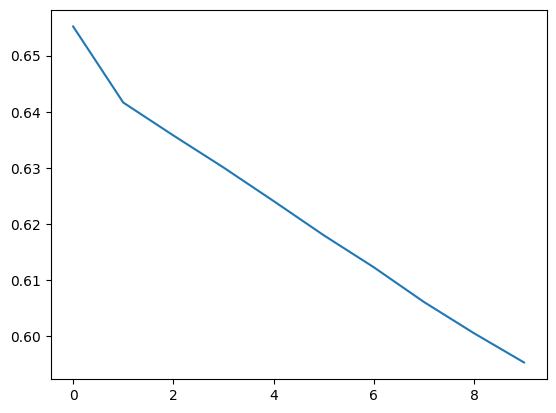

In [7]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.show()

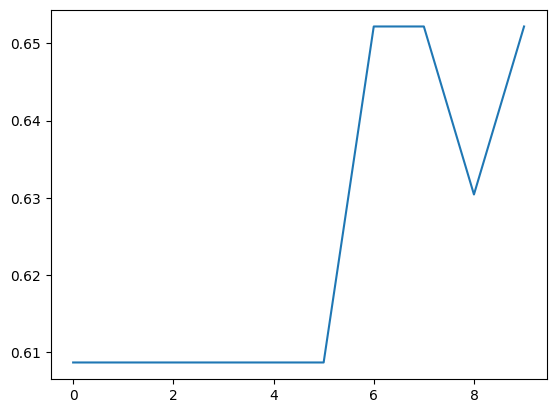

In [8]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.show()

# Inline Prediction

In [9]:
y_pred=model.predict(X)
import numpy as np
y_01=np.round(y_pred)
y_01

2/2 [==============================] - 0s 6ms/step


array([[0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

# Computing the metrics using the training data

Producing Confusion Matrix

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,y_01)

array([[ 6, 15],
       [ 1, 24]])

In [11]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
ac=accuracy_score(y,y_01)
pr=precision_score(y,y_01)
rc=recall_score (y,y_01)
fs=f1_score(y,y_01)
print(ac)

0.6521739130434783


# Producing a Chart

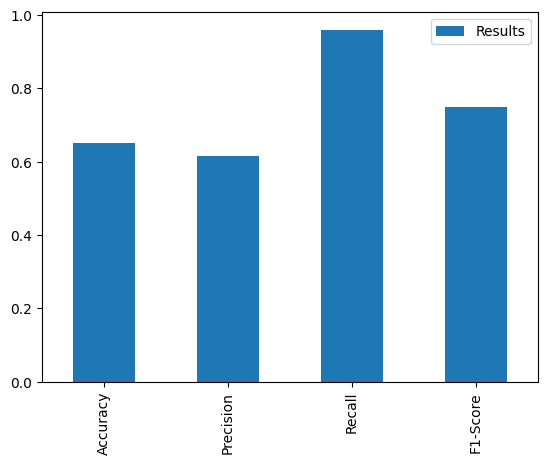

In [12]:
results=[ac,pr,rc,fs]
indices=["Accuracy","Precision","Recall","F1-Score"]
df=pd.DataFrame({"Results":results},index=indices)
df.plot.bar()
plt.show()

# Conclusion:

### (1)  We constructed an ANN with 4 hidden layers with 8,16,16,8 neurons for bankruptcy data
### (2)  The results of the classification metrics is given by a chart 

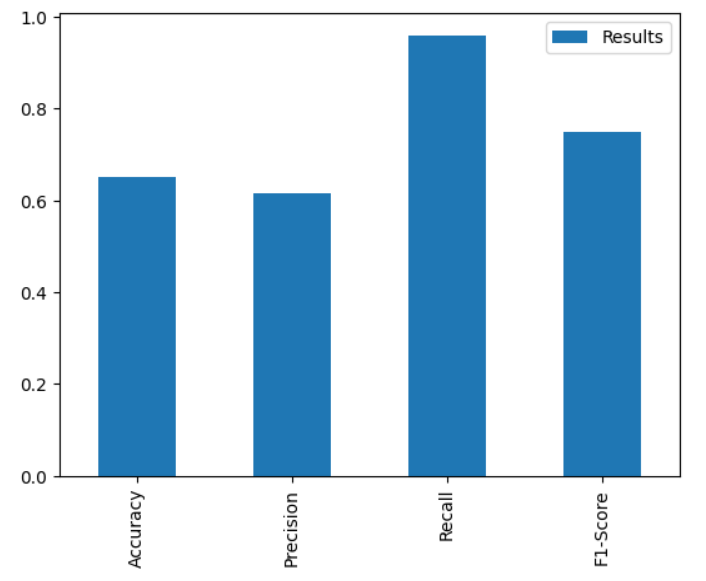

### (3)  Thus, we illustrated the sample prediction using the model we constructed.